# Credit Card Statement Analysis

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
df = pd.read_csv('./data/credit_card_statement.csv')

df.head()

,Transaction Date,Post Date,Description,Category,Type,Amount,Memo
0,9/12/2022,9/12/2022,Payment Thank You-Mobile,NaN,Payment,1065.45,NaN
1,9/7/2022,9/8/2022,OTF KING PRUSSIA 0591,Health & Wellness,Sale,-179.00,NaN
2,9/7/2022,9/8/2022,VANILLAGIFT.COM,Shopping,Sale,-711.90,NaN
3,9/5/2022,9/6/2022,TST* EDDIE CONFETTI'S ICE,Food & Drink,Sale,-5.00,NaN
4,9/5/2022,9/5/2022,CHEESECAKE 046 ONLINE,Food & Drink,Sale,-10.55,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction Date  2112 non-null   object 
 1   Post Date         2112 non-null   object 
 2   Description       2112 non-null   object 
 3   Category          1896 non-null   object 
 4   Type              2112 non-null   object 
 5   Amount            2112 non-null   float64
 6   Memo              0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 115.6+ KB


In [5]:
#drop 'Memo' column since it has 0 records

df = df.drop('Memo', axis=1)

df.head()

,Transaction Date,Post Date,Description,Category,Type,Amount
0,9/12/2022,9/12/2022,Payment Thank You-Mobile,NaN,Payment,1065.45
1,9/7/2022,9/8/2022,OTF KING PRUSSIA 0591,Health & Wellness,Sale,-179.00
2,9/7/2022,9/8/2022,VANILLAGIFT.COM,Shopping,Sale,-711.90
3,9/5/2022,9/6/2022,TST* EDDIE CONFETTI'S ICE,Food & Drink,Sale,-5.00
4,9/5/2022,9/5/2022,CHEESECAKE 046 ONLINE,Food & Drink,Sale,-10.55


In [6]:
#Converting both dates to datetime format 
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

df['Post Date'] = pd.to_datetime(df['Post Date'])

df.head()

,Transaction Date,Post Date,Description,Category,Type,Amount
0,2022-09-12,2022-09-12,Payment Thank You-Mobile,NaN,Payment,1065.45
1,2022-09-07,2022-09-08,OTF KING PRUSSIA 0591,Health & Wellness,Sale,-179.00
2,2022-09-07,2022-09-08,VANILLAGIFT.COM,Shopping,Sale,-711.90
3,2022-09-05,2022-09-06,TST* EDDIE CONFETTI'S ICE,Food & Drink,Sale,-5.00
4,2022-09-05,2022-09-05,CHEESECAKE 046 ONLINE,Food & Drink,Sale,-10.55


In [7]:
df = df.sort_values(['Post Date'])

df.reset_index(inplace = True, drop = True)

df.head()

,Transaction Date,Post Date,Description,Category,Type,Amount
0,2020-09-19,2020-09-20,SQ *POMMES FRITES,Food & Drink,Sale,-28.85
1,2020-09-20,2020-09-20,STARBUCKS 800-782-7282,Food & Drink,Sale,-10.00
2,2020-09-17,2020-09-20,THE HOME DEPOT 4188,Home,Sale,-32.16
3,2020-09-17,2020-09-20,DOMINO'S 4811,Food & Drink,Sale,-10.59
4,2020-09-19,2020-09-20,TARGET.COM *,Shopping,Sale,-169.56


In [8]:
#extract date month and year from Post Date
import datetime
df['Post Month'] = pd.DatetimeIndex(df['Post Date']).month

df['Post Year'] = pd.DatetimeIndex(df['Post Date']).year


df.head()

,Transaction Date,Post Date,Description,Category,Type,Amount,Post Month,Post Year
0,2020-09-19,2020-09-20,SQ *POMMES FRITES,Food & Drink,Sale,-28.85,9,2020
1,2020-09-20,2020-09-20,STARBUCKS 800-782-7282,Food & Drink,Sale,-10.00,9,2020
2,2020-09-17,2020-09-20,THE HOME DEPOT 4188,Home,Sale,-32.16,9,2020
3,2020-09-17,2020-09-20,DOMINO'S 4811,Food & Drink,Sale,-10.59,9,2020
4,2020-09-19,2020-09-20,TARGET.COM *,Shopping,Sale,-169.56,9,2020


In [9]:
#filter data to get only 'Sale' and 'Return' type, remove Payments, fees and adjustments
sale_results = df.loc[(df['Type'] == 'Sale') | (df['Type'] == 'Return')]

sale_results.head()

,Transaction Date,Post Date,Description,Category,Type,Amount,Post Month,Post Year
0,2020-09-19,2020-09-20,SQ *POMMES FRITES,Food & Drink,Sale,-28.85,9,2020
1,2020-09-20,2020-09-20,STARBUCKS 800-782-7282,Food & Drink,Sale,-10.00,9,2020
2,2020-09-17,2020-09-20,THE HOME DEPOT 4188,Home,Sale,-32.16,9,2020
3,2020-09-17,2020-09-20,DOMINO'S 4811,Food & Drink,Sale,-10.59,9,2020
4,2020-09-19,2020-09-20,TARGET.COM *,Shopping,Sale,-169.56,9,2020


In [10]:
sale_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1858 entries, 0 to 2111
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction Date  1858 non-null   datetime64[ns]
 1   Post Date         1858 non-null   datetime64[ns]
 2   Description       1858 non-null   object        
 3   Category          1858 non-null   object        
 4   Type              1858 non-null   object        
 5   Amount            1858 non-null   float64       
 6   Post Month        1858 non-null   int64         
 7   Post Year         1858 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 130.6+ KB


In [11]:
#convert negative values in postive values
sale_results['Modified Amount'] = sale_results['Amount'] * -1


sale_results.head()

<ipython-input-11-3263cf0a6899>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_results['Modified Amount'] = sale_results['Amount'] * -1


,Transaction Date,Post Date,Description,Category,Type,Amount,Post Month,Post Year,Modified Amount
0,2020-09-19,2020-09-20,SQ *POMMES FRITES,Food & Drink,Sale,-28.85,9,2020,28.85
1,2020-09-20,2020-09-20,STARBUCKS 800-782-7282,Food & Drink,Sale,-10.00,9,2020,10.00
2,2020-09-17,2020-09-20,THE HOME DEPOT 4188,Home,Sale,-32.16,9,2020,32.16
3,2020-09-17,2020-09-20,DOMINO'S 4811,Food & Drink,Sale,-10.59,9,2020,10.59
4,2020-09-19,2020-09-20,TARGET.COM *,Shopping,Sale,-169.56,9,2020,169.56


### Question 1: What are is the total spending in each category, like shopping, food etc.

In [12]:
category_results = sale_results.groupby('Category').sum('Modified_Amount')

In [13]:
print(category_results)

                         Amount  Post Month  Post Year  Modified Amount
Category                                                               
Automotive             -2042.69          88      28297          2042.69
Bills & Utilities      -2856.46         536     149555          2856.46
Education               -176.28          27       8084           176.28
Entertainment          -1624.54         318      97014          1624.54
Food & Drink          -14953.55        4007    1121676         14953.55
Gas                    -3226.75         575     161685          3226.75
Gifts & Donations       -344.40          26       6066           344.40
Groceries              -9761.95        1888     549763          9761.95
Health & Wellness      -4950.61         476     133385          4950.61
Home                   -3660.64         337      76790          3660.64
Personal               -1178.20         212      64676          1178.20
Professional Services  -3912.09          48      16173          

<AxesSubplot:xlabel='Category'>

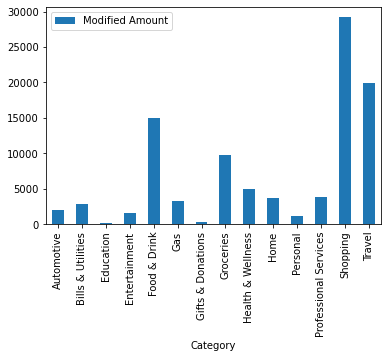

In [14]:
category_results.plot.bar(y= 'Modified Amount', use_index = True)

##### Shopping, Travel, Food & Drink are the top 3 spending categories over the last 36 months

### Question 2: Total Spending each Year and Maximum spending month each year

In [15]:
 sale_results.groupby('Post Year').sum('Modified Amount')

,Amount,Post Month,Modified Amount
Post Year,,,
2020,-17793.09,3896,17793.09
2021,-58917.59,6777,58917.59
2022,-21150.52,2717,21150.52


##### Since we have data for only last 3 months of 2020, entire 2021 and 8 months of 2022, the total spending numbers are drasticaly different

##### It should be noted though that the spending in the first 8 months of 2022 is just $4,000 greater than the spending of last 3 months of 2020

### Question 3: What are the quarterly spending trends

In [16]:
# We will divide the data into 4 quaters: January, February, and March (Q1) April, May, and June (Q2) July, August, and September (Q3) October, November, and December (Q4)

sale_results['Quarter']= sale_results['Post Date'].dt.to_period(' Q')

sale_results.head()

<ipython-input-16-ea58ee3f5b9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_results['Quarter']= sale_results['Post Date'].dt.to_period(' Q')


,Transaction Date,Post Date,Description,Category,Type,Amount,Post Month,Post Year,Modified Amount,Quarter
0,2020-09-19,2020-09-20,SQ *POMMES FRITES,Food & Drink,Sale,-28.85,9,2020,28.85,2020Q3
1,2020-09-20,2020-09-20,STARBUCKS 800-782-7282,Food & Drink,Sale,-10.00,9,2020,10.00,2020Q3
2,2020-09-17,2020-09-20,THE HOME DEPOT 4188,Home,Sale,-32.16,9,2020,32.16,2020Q3
3,2020-09-17,2020-09-20,DOMINO'S 4811,Food & Drink,Sale,-10.59,9,2020,10.59,2020Q3
4,2020-09-19,2020-09-20,TARGET.COM *,Shopping,Sale,-169.56,9,2020,169.56,2020Q3


In [17]:
sale_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1858 entries, 0 to 2111
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction Date  1858 non-null   datetime64[ns]
 1   Post Date         1858 non-null   datetime64[ns]
 2   Description       1858 non-null   object        
 3   Category          1858 non-null   object        
 4   Type              1858 non-null   object        
 5   Amount            1858 non-null   float64       
 6   Post Month        1858 non-null   int64         
 7   Post Year         1858 non-null   int64         
 8   Modified Amount   1858 non-null   float64       
 9   Quarter           1858 non-null   period[Q-DEC] 
dtypes: datetime64[ns](2), float64(2), int64(2), object(3), period[Q-DEC](1)
memory usage: 159.7+ KB


In [18]:
#converting Quarter to string since matplotlib cannot map period to float
sale_results['Quarter'] = sale_results['Quarter'].astype(str)

sale_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1858 entries, 0 to 2111
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction Date  1858 non-null   datetime64[ns]
 1   Post Date         1858 non-null   datetime64[ns]
 2   Description       1858 non-null   object        
 3   Category          1858 non-null   object        
 4   Type              1858 non-null   object        
 5   Amount            1858 non-null   float64       
 6   Post Month        1858 non-null   int64         
 7   Post Year         1858 non-null   int64         
 8   Modified Amount   1858 non-null   float64       
 9   Quarter           1858 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 159.7+ KB


<ipython-input-18-3dc962219080>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_results['Quarter'] = sale_results['Quarter'].astype(str)


In [19]:
Q12021_Sales = sale_results.loc[sale_results['Quarter'] == '2021Q1']

In [26]:
Q12021_Sales.sort_values(by=['Modified Amount'], ascending=False, inplace=True)

Q12021_Sales.head(20)

<ipython-input-26-43b5fa11a4b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q12021_Sales.sort_values(by=['Modified Amount'], ascending=False, inplace=True)


,Transaction Date,Post Date,Description,Category,Type,Amount,Post Month,Post Year,Modified Amount,Quarter
485,2021-01-30,2021-01-31,JARED.COM #2001,Shopping,Sale,-2967.99,1,2021,2967.99,2021Q1
533,2021-02-19,2021-02-21,JARED.COM #2001,Shopping,Sale,-2967.99,2,2021,2967.99,2021Q1
599,2021-03-15,2021-03-16,COSTCO TRAVEL,Travel,Sale,-1586.31,3,2021,1586.31,2021Q1
566,2021-03-03,2021-03-04,WWW COSTCO COM,Shopping,Sale,-815.88,3,2021,815.88,2021Q1
614,2021-03-21,2021-03-22,TARGET 00025965,Shopping,Sale,-367.56,3,2021,367.56,2021Q1
539,2021-02-21,2021-02-22,COSTCO WHSE #0245,Shopping,Sale,-288.95,2,2021,288.95,2021Q1
554,2021-02-27,2021-02-28,UNDER ARMOUR FACTORY 118,Shopping,Sale,-223.40,2,2021,223.40,2021Q1
424,2021-01-03,2021-01-04,COSTCO WHSE #0245,Shopping,Sale,-213.13,1,2021,213.13,2021Q1
508,2021-02-10,2021-02-11,COSTCO WHSE #0245,Shopping,Sale,-212.91,2,2021,212.91,2021Q1
630,2021-03-28,2021-03-29,COSTCO WHSE #0245,Shopping,Sale,-206.02,3,2021,206.02,2021Q1


In [23]:
Q22021_Sales = sale_results.loc[sale_results['Quarter'] == '2021Q2']

In [24]:
Q22021_Sales.sort_values(by=['Modified Amount'], ascending=False, inplace=True)

Q22021_Sales.head(20)

<ipython-input-24-5ce992b42bdb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q22021_Sales.sort_values(by=['Modified Amount'], ascending=False, inplace=True)


,Transaction Date,Post Date,Description,Category,Type,Amount,Post Month,Post Year,Modified Amount,Quarter
691,2021-04-18,2021-04-19,AIRBNB * HMHQEDWMRT,Travel,Sale,-2522.47,4,2021,2522.47,2021Q2
709,2021-04-19,2021-04-21,TIFFANY &amp; CO #021,Shopping,Sale,-2438.00,4,2021,2438.00,2021Q2
925,2021-06-07,2021-06-08,AVIS.COM PREPAY,Travel,Sale,-1082.81,6,2021,1082.81,2021Q2
805,2021-05-12,2021-05-13,COSTCO TRAVEL,Travel,Sale,-710.19,5,2021,710.19,2021Q2
923,2021-06-07,2021-06-08,AIRBNB HM9JWS3NS3,Travel,Sale,-606.19,6,2021,606.19,2021Q2
692,2021-04-18,2021-04-19,EXPRESS#0755,Shopping,Sale,-444.17,4,2021,444.17,2021Q2
802,2021-05-11,2021-05-12,GROUPON INC,Personal,Sale,-346.00,5,2021,346.00,2021Q2
921,2021-06-07,2021-06-08,AMERICAN AIR0012179764509,Travel,Sale,-294.80,6,2021,294.80,2021Q2
922,2021-06-07,2021-06-08,AMERICAN AIR0012179764507,Travel,Sale,-294.80,6,2021,294.80,2021Q2
848,2021-05-21,2021-05-23,TARGET 00025965,Shopping,Sale,-276.28,5,2021,276.28,2021Q2


In [34]:
quarter_results = sale_results.groupby('Quarter').sum('Modified Amount')

In [35]:
quarter_results.reset_index(inplace=True)
quarter_results = quarter_results.rename(columns = {'index':'Quarter'})
quarter_results = quarter_results.drop(['Amount', 'Post Month', 'Post Year'], axis=1)

quarter_results.head(12)

,Quarter,Modified Amount
0,2020Q3,2109.66
1,2020Q4,15683.43
2,2021Q1,11078.99
3,2021Q2,19211.71
4,2021Q3,13637.13
5,2021Q4,14989.76
6,2022Q1,2080.41
7,2022Q2,9013.86
8,2022Q3,10056.25


##### We see bigger one-time purchases were made in Q1 and Q2 quarter of 2021, driving up the purchases of 2021 much higher than 2022

In [20]:
quarter_results[['Year','Quarter']] = quarter_results.Quarter.apply(lambda x: pd.Series(str(x).split("Q")))

quarter_results.head()

,Quarter,Modified Amount,Year
0,3,2109.66,2020
1,4,15683.43,2020
2,1,11078.99,2021
3,2,19211.71,2021
4,3,13637.13,2021


<AxesSubplot:xlabel='Quarter'>

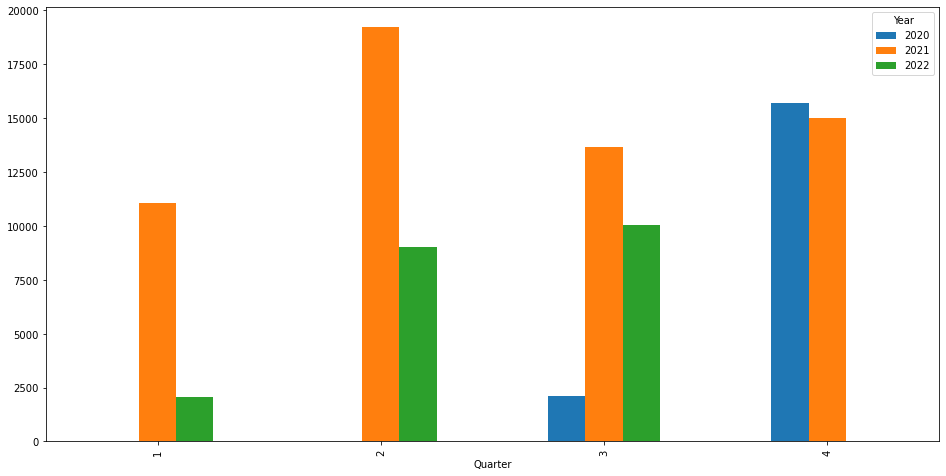

In [21]:
#plot a grouped bar chart to compare quarter on quarter spending for each year

quarter_results.pivot_table(index='Quarter', columns = 'Year')

quarter_results.pivot_table(index='Quarter', columns = 'Year').plot(kind='bar', y = 'Modified Amount' ,figsize=(16,8))

### Question 3: Seasonality of purchase? Which months have a higher purchase trends

In [22]:
monthly_results = sale_results.groupby('Post Month').sum('Modified Amount')

monthly_results.head(12)

,Amount,Post Year,Modified Amount
Post Month,,,
1,-5185.16,149565,5185.16
2,-3038.02,163719,3038.02
3,-4936.22,179893,4936.22
4,-10273.81,278937,10273.81
5,-9482.92,448746,9482.92
6,-8468.84,325443,8468.84
7,-8719.89,357802,8719.89
8,-7873.11,386081,7873.11
9,-9210.04,390058,9210.04


<AxesSubplot:xlabel='Post Month'>

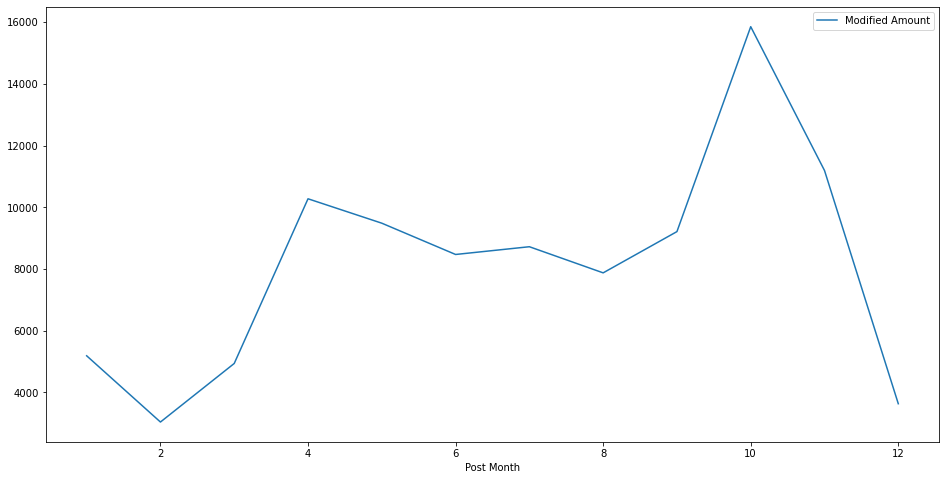

In [23]:
monthly_results.plot(kind='line', y = 'Modified Amount' ,figsize=(16,8))

### Question 4: Is online vs offline purchases higher?

In [32]:
#find '.com', 'ONLINE', 'Amazon', 'AMZN' 'Groupon', 'INC' in description to find whether purchase was done online

contain_values = sale_results[sale_results['Description'].str.contains('.COM|online|Amazon|Amzn|Groupon|inc', case = False)]
print(contain_values)


#Only a fraction of transactions are done online, majority of sales are in-store

     Transaction Date  Post Date             Description      Category  Type  \
4          2020-09-19 2020-09-20           TARGET.COM  *      Shopping  Sale   
36         2020-09-26 2020-09-27         CHIPOTLE ONLINE  Food & Drink  Sale   
37         2020-09-26 2020-09-27  AMZN Mktp US*M40J93590      Shopping  Sale   
44         2020-09-27 2020-09-28    Amazon.com*M47PX7WJ1      Shopping  Sale   
55         2020-09-30 2020-10-01  AMZN Mktp US*M436C7U90      Shopping  Sale   
...               ...        ...                     ...           ...   ...   
2078       2022-09-07 2022-09-08         VANILLAGIFT.COM      Shopping  Sale   
2082       2022-09-07 2022-09-08           TARGET.COM  *      Shopping  Sale   
2087       2022-09-09 2022-09-11           TARGET.COM  *      Shopping  Sale   
2092       2022-09-11 2022-09-12  OHIOPYLE CANDY COMPANY  Food & Drink  Sale   
2102       2022-09-14 2022-09-15           TARGET.COM  *      Shopping  Sale   

      Amount  Post Month  Post Year  Mo

### Question 5: Which store has most spending?

In [52]:
sale_results['Store Name'] = sale_results['Description'].str[:5]
sale_results.head()

<ipython-input-52-7e3c06c74280>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_results['Store Name'] = sale_results['Description'].str[:5]


,Transaction Date,Post Date,Description,Category,Type,Amount,Post Month,Post Year,Modified Amount,Quarter,Store Name
0,2020-09-19,2020-09-20,SQ *POMMES FRITES,Food & Drink,Sale,-28.85,9,2020,28.85,2020Q3,SQ *P
1,2020-09-20,2020-09-20,STARBUCKS 800-782-7282,Food & Drink,Sale,-10.00,9,2020,10.00,2020Q3,STARB
2,2020-09-17,2020-09-20,THE HOME DEPOT 4188,Home,Sale,-32.16,9,2020,32.16,2020Q3,THE H
3,2020-09-17,2020-09-20,DOMINO'S 4811,Food & Drink,Sale,-10.59,9,2020,10.59,2020Q3,DOMIN
4,2020-09-19,2020-09-20,TARGET.COM *,Shopping,Sale,-169.56,9,2020,169.56,2020Q3,TARGE


In [56]:
highest_spending_store = sale_results.groupby(['Store Name']).sum('Modified Amount')

highest_spending_store  = highest_spending_store.sort_values(by = 'Modified Amount', ascending = False)

highest_spending_store.head()

,Amount,Post Month,Post Year,Modified Amount
Store Name,,,,
COSTC,-6076.39,388,115196,6076.39
AIRBN,-5537.07,36,10105,5537.07
WEGMA,-5295.64,954,280954,5295.64
TARGE,-5014.01,703,173797,5014.01
KLASK,-3547.26,20,6065,3547.26


##### The highest spending stores are grocery stores like Costco, Target and Wegmans, also travel lodging like Airbnb